<a href="https://colab.research.google.com/github/Rupasri0105/ADM-LAB/blob/main/ASSIGNMENT_2(1918).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
# Step 1: Load the dataset
data = pd.read_csv("employee_performance.csv")

In [7]:
# Step 2: Generate statistical summaries
print("Statistical Summaries:")
print(data.describe())
print("\nDataset Information:")
print(data.info())

Statistical Summaries:
       Employee_ID  Monthly_Salary  Years_of_Experience  Performance_Score
count   100.000000      100.000000           100.000000         100.000000
mean     50.500000    74155.081700            10.240000           5.500000
std      29.011492    24765.021112             5.778959           2.858622
min       1.000000    30634.090000             1.000000           1.000000
25%      25.750000    54103.632500             6.000000           3.000000
50%      50.500000    73622.835000            10.000000           6.000000
75%      75.250000    94087.112500            16.000000           8.000000
max     100.000000   119817.320000            20.000000          10.000000

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employee_ID          100 non-null    int64  
 1   Department           1

In [8]:
# Step 3: Data transformation
# Encoding categorical data
if 'Department' in data.columns:
    data['Department_Encoded'] = data['Department'].astype('category').cat.codes

In [9]:
# Create new derived columns (e.g., categorize Performance_Score)
def categorize_performance(score):
    if score >= 8:
        return 'High'
    elif score >= 5:
        return 'Medium'
    else:
        return 'Low'

In [10]:
data['Performance_Category'] = data['Performance_Score'].apply(categorize_performance)

In [11]:
# Grouping and Aggregation
agg_data = data.groupby('Department').agg({
    'Monthly_Salary': ['mean', 'median'],
    'Years_of_Experience': 'mean',
    'Performance_Score': 'mean'
}).reset_index()

In [12]:
print("\nAggregated Data by Department:")
print(agg_data)


Aggregated Data by Department:
   Department Monthly_Salary            Years_of_Experience Performance_Score
                        mean     median                mean              mean
0     Finance   77424.422667  78392.370           10.200000          5.533333
1          HR   75454.913125  76964.880           11.437500          6.312500
2          IT   73841.640000  72834.580           11.250000          5.600000
3   Marketing   67350.616667  61562.960           11.222222          4.666667
4  Operations   73694.855000  75096.880            7.875000          5.791667
5       Sales   74699.896875  75246.585           10.812500          4.562500


In [13]:
# Step 4: Create visualizations
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

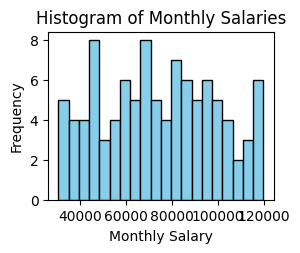

In [14]:
# Histogram of Monthly Salaries
plt.subplot(2, 2, 1)
plt.hist(data['Monthly_Salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Salaries')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')

Text(0, 0.5, 'Performance Score')

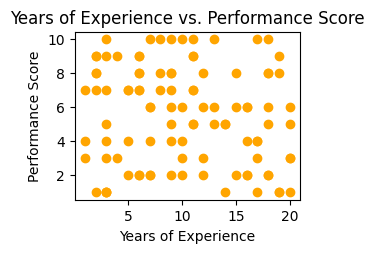

In [15]:
# Scatter Plot: Years of Experience vs. Performance Score
plt.subplot(2, 2, 2)
plt.scatter(data['Years_of_Experience'], data['Performance_Score'], color='orange')
plt.title('Years of Experience vs. Performance Score')
plt.xlabel('Years of Experience')
plt.ylabel('Performance Score')

Text(0.5, 1.0, 'Correlation Heatmap')

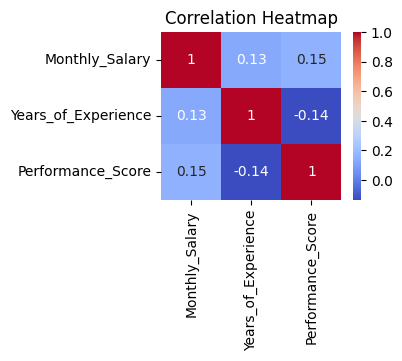

In [16]:
# Heatmap of numerical features
plt.subplot(2, 2, 3)
correlation = data[['Monthly_Salary', 'Years_of_Experience', 'Performance_Score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [18]:
# Save the processed dataset to a new CSV file
data.to_csv("processed_employee_performance.csv", index=False)
print("Processed dataset saved as 'processed_employee_performance.csv'")

Processed dataset saved as 'processed_employee_performance.csv'
